### Understanding optimization in Ridge

Here we have Ridge regression where a regularization term is added to the loss function. So, in order to optimize the loss function we use gradient descent with varying parameters according to the demand of the data and our understanding.

So, first we create a dataset following the normal distribution. We must also add an error term in order to make the dataset pragmatic. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.metrics import mean_squared_error,r2_score
from ipywidgets import interact, interact_manual
%matplotlib inline

In [8]:
def gen_data(n):
    d=100
    w=np.zeros(d)
    for i in range(0,10):
        w[i]=1.0
    trainx=np.random.normal(size=(n,d))
    trainy=np.dot(trainx,w)+np.random.normal(size=n)
    return trainx,trainy

In [9]:
x,y=gen_data(500)

Now that data is generated we must define a function ridge_GD which takes three arguments training data(x,y) and regularization parameter(C). It should give out feature matrix(w) with offset(b) and losses. As the stepsize will be small enough so after a certain value the loss function decreases very slowly that it hardly affects the output. Hence after a vety small value (say, 2*10e-20) we stop and conclude that our loss funcion has converged.  

In [22]:
def ridge_GD(x,y,C=1,max_iter=100,step=0.001):
    
    f=x.shape[1]
    b=0
    w0=np.zeros(f+1)
    wt=np.empty((max_iter,f+1))
    losses=np.empty(0)
    X=np.append(np.ones((len(x),1)),x,axis=1)
    
    for i in range(1,max_iter):
        resid=y-(np.dot(X,w0))
        db=-2*sum(resid)
        dL=np.dot(x.T,-2*resid)+2*C*np.linalg.norm(w0[1:])
        w0-=step*np.append(db,dL)
        loss=(sum(resid)**2)/len(x)
        
        if loss<(2*(10**-20)):
            break
            
        wt[i,]=w0
        losses=np.append(losses,abs(loss))
        
    return wt[:,1:],wt[:,0],losses

### Finding best value of stepsize

In [23]:
@interact_manual(s=[1,0.1,0.001,0.0001,0.0009,0.00001,0.000001])
def f(s):
    w,b,loss=ridge_GD(x,y,max_iter=1000,step=s)
    loss=loss[~np.isnan(loss)]
    index=np.argmin(loss)
    y_hat=x.dot(w[index])+b[index]
    print('Mean-squared error: ',mean_squared_error(y,y_hat))
    try:    
        r2=r2_score(y_hat,y)
        print('R-squared error at best fit of step size is: ',r2)
    except:
        print('Cannot calculate R-squarred error, one or more coefficients are infinity')

interactive(children=(Dropdown(description='s', options=(1, 0.1, 0.001, 0.0001, 0.0009, 1e-05, 1e-06), value=1…

As seen, the perfect fit comes with step size=0.0009 in this situation.
We cannot use a constant schedule of 1/t here as the cofficients of features are either 0 or 1 which will be skipped in the first iteration.


### Visualizing different values of loss at each iteration 

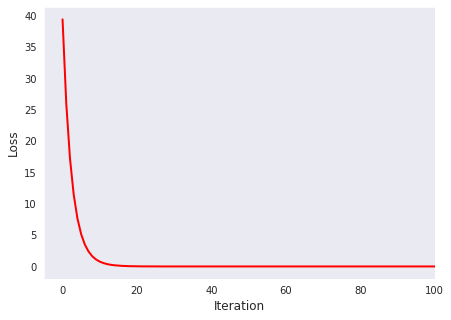

In [28]:
import seaborn as sns
w,b,loss=ridge_GD(x,y,max_iter=1000,step=0.0001)
ind=np.argmin(loss)
sns.set_style('dark')
plt.figure(figsize=(7,5))
plt.plot(loss,lw=2,color='red')
plt.xlim(-5,100)
plt.xlabel('Iteration',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.show()

### Comparisson with scikit-learn solver

In [29]:
from sklearn.linear_model import Ridge
model=Ridge()
model.fit(x,y)
y_hat=model.predict(x)
print('Mean-squared error of solver: ',mean_squared_error(y,y_hat))
print("R squared error of solver: ",r2_score(y,y_hat))
print("Distance between coeffcients: ",np.linalg.norm(model.coef_-w[ind]))

Mean-squared error of solver:  0.7301567562184009
R squared error of solver:  0.9306787575447554
Distance between coeffcients:  0.08463943656421048
